### Identify a model to determine the price of a car and the factors which impact this price
- Load the data from .csv file
    - Determine the encoding.
- Data Preprocessing
    - Convert the independent variables from categorical to Numeric.
    - Convert the categorigcal variables to dummy variables
- Splitting the data into Train and Test and Feature selection
    - Split the data set into a Train and Test. Distribution of 70-30 between Train and Test Data
    - use the standardized scaling to scale features.
- Build the Model
    - Use RFE to identify the best 25 Features for the Model. Take the RFE output as the starting Model
    - Create Multiple models , Manual changes in the features verify the significance(P-value) and R square of the model.
    - Build model on the training data
- Residual Analysis for the Model
    - Check for the Residual error in the training set. It should be a normal curve and its mean should be ~ zero
- Making the prediction on the test data using appropriate Model
- Model Evaluation by looking at the R square score and scatter plot distribution

### Conclusion based on the Model
- `Price` of the car is a factor of the following inouts and these inputs are able to explain upto 90% of the variation in the Price
    - `fueltype` - Type of Fuel used by the Car
    - `aspiration` -
    - `enginelocation` - Location of the engine in the car
    - `carwidth` - Width of the car
    - `cylindernumber` - 
    - `enginesize` - 
    - `boreratio` -
    - `Car_bmw`,`Car_buick`,`Car_mitsubushi`, `Car_peugeot`,`Car_porsche`,`Car_saab`,`Car_subaru`,`Car_volvo` - Brand of the Car
    - `carbody_convertible` - Type of the Car body
    - `enginetype_dohc`,`enginetype_ohc`,`enginetype_ohcv` - Engine Type of the car
    - `fuelsystem_idi` - Type of Fuel used by the Car


### 1 - Load the data from .csv file

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

df_cardata = pd.read_csv("CarPrice_Assignment.csv",encoding='cp1252')

In [2]:
df_cardata.shape

(205, 26)

In [3]:
# check the information about the data set
df_cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### 2- Data Pre Processing
- Convert the independent variables from categorical to Numeric.
- Convert the categorigcal variables to dummy variables

In [4]:
#Create a 'Car' column which will hold the value for the car company name
df_cardata['CarName'] = df_cardata['CarName'].str.strip()
df_cardata['Car'] = df_cardata['CarName'].str.split(expand=True)[0]

In [5]:
#Drop the column 'CarName'
#Remove the unwanted colun 'CarName' from the dataset
df_cardata = df_cardata.drop("CarName", axis=1)

In [6]:
# convert categorical values into numeric

df_cardata['fueltype'] = pd.Categorical(df_cardata['fueltype']).codes
df_cardata['aspiration'] = pd.Categorical(df_cardata['aspiration']).codes
df_cardata['enginelocation'] = pd.Categorical(df_cardata['enginelocation']).codes
df_cardata['doornumber'] = pd.Categorical(df_cardata['doornumber']).codes

In [7]:
#df_cardata['fuelsystem'].value_counts()

In [8]:
#Convert categorical to numeric
# df_cardata['doornumber'] = df_cardata['doornumber'].str.lower()
# df_cardata['doornumber'] = df_cardata['doornumber'].map({'two': 2, 'four': 4})

In [9]:
# df_cardata['cylindernumber'] = df_cardata['cylindernumber'].str.strip()
# df_cardata['cylindernumber'] = df_cardata['cylindernumber'].str.lower()
# df_cardata['cylindernumber'] = df_cardata['cylindernumber'] \
# .map({'six': 6, 'four': 4, 'five':5,'eight' :8, 'two':2, 'twelve':12, 'three':3})

#### - Create Dummy variables for the `Car` , `carbody`, `enginetype`,`fuelsystem`,`drivewheel`

In [10]:
# Create dummy variable for the categorical values
car_catg = pd.get_dummies(df_cardata[['Car','carbody','enginetype','fuelsystem','drivewheel','cylindernumber']],drop_first=True)


#### - Concat  the `categorical` dataset with the orignal dataset and drop the appropriate columns such as `car`,`carbody`,`enginetype`,`fuelsystem`,`drivewheel`

In [11]:
df_cardata = pd.concat([df_cardata,car_catg], axis=1)

In [12]:
#drop the columns
df_cardata = df_cardata.drop(['car_ID','Car','carbody','enginetype','fuelsystem','drivewheel','cylindernumber'],axis=1)

### 3 - Splitting the data into Train and Test and Feature selection
- Split the data set into a Train and Test. Distribution of 70-30 between Train and Test Data
- Use RFE to identify the best 25 Features for the Model. Take the RFE output as the starting Model
- Create Multiple models , Remove one feature at a time to verify the significance and R square of the model.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#define X and y sets
X = df_cardata.copy()
y = X.pop("price")

X_train ,X_test ,y_train, y_test = train_test_split(X ,y ,test_size=0.3 ,random_state=100)

In [14]:
from sklearn.preprocessing import StandardScaler
lst_scaler_col = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke', \
                  'compressionratio','horsepower','peakrpm','citympg','highwaympg']
scaler = StandardScaler()
X_train[lst_scaler_col] = scaler.fit_transform(X_train[lst_scaler_col])

In [15]:
df_cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 71 columns):
symboling                205 non-null int64
fueltype                 205 non-null int8
aspiration               205 non-null int8
doornumber               205 non-null int8
enginelocation           205 non-null int8
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
Car_alfa-romero          205 non-null uint8
Car

####  - Feature selection using RFE since the number of columns are 77 and it cannot be done manually

In [16]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 25
sk_lm = LinearRegression()
sk_lm.fit(X_train, y_train)

rfe = RFE(sk_lm, 25)             
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

col

Index(['aspiration', 'enginelocation', 'carwidth', 'enginesize', 'boreratio',
       'stroke', 'Car_audi', 'Car_bmw', 'Car_buick', 'Car_mitsubishi',
       'Car_peugeot', 'Car_porsche', 'Car_saab', 'Car_subaru', 'Car_volvo',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

#### - Create Model 1 using the RFE suggested columns


In [17]:
import statsmodels.api as sm
lst_vars = ['aspiration', 'enginelocation', 'carwidth', 'enginesize', 'boreratio', \
       'stroke', 'Car_audi', 'Car_bmw', 'Car_buick', 'Car_mitsubishi', \
       'Car_peugeot', 'Car_porsche', 'Car_saab', 'Car_subaru', 'Car_volvo', \
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf', \
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', \
        'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', \
       'cylindernumber_two']    
X_train_lm1 = sm.add_constant(X_train[lst_vars])
lr1 = sm.OLS(y_train, X_train_lm1).fit()


In [18]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           6.06e-70
Time:                        08:22:25   Log-Likelihood:                -1262.9
No. Observations:                 143   AIC:                             2572.
Df Residuals:                     120   BIC:                             2640.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2951.42

- The Model created has a veyr high Adg R Square of 0.935
- p-Value of column `fuelsystem_4bbl` is high and this column can be dropped from the Model

#### - Create Model 2 using the RFE suggested columns and removing `fuelsystem_4bbl`


In [19]:
# Remove the col - fuelsystem_4bbl
lst_vars = ['aspiration', 'enginelocation', 'carwidth', 'enginesize', 'boreratio', \
       'stroke','Car_bmw', 'Car_buick', 'Car_mitsubishi', \
       'Car_peugeot', 'Car_porsche', 'Car_saab', 'Car_subaru', 'Car_volvo', \
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf', \
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', \
        'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', \
       'cylindernumber_two'] 

X_train_lm2 = sm.add_constant(X_train[lst_vars])
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.21e-70
Time:                        08:22:25   Log-Likelihood:                -1263.8
No. Observations:                 143   AIC:                             2572.
Df Residuals:                     121   BIC:                             2637.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -868.73

- The Model created has a veyr high Adg R Square of 0.935
- P-Value of column `compressionratio` is high and this column can be dropped from the Model

#### - Create Model 3 using the RFE suggested columns


In [20]:
# Remove the col - 'compressionratio'
lst_vars = ['aspiration', 'enginelocation', 'carwidth', 'enginesize', 'boreratio', \
       'stroke',  'Car_bmw',  'Car_mitsubishi', \
       'Car_peugeot', 'Car_porsche', 'Car_saab', 'Car_subaru', 'Car_volvo', \
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf', \
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', \
        'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', \
       'cylindernumber_two']

X_train_lm3 = sm.add_constant(X_train[lst_vars])
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     126.4
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.21e-71
Time:                        08:22:25   Log-Likelihood:                -1264.0
No. Observations:                 143   AIC:                             2570.
Df Residuals:                     122   BIC:                             2632.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -427.90

- The Model created has a veyr high Adg R Square of 0.936
- P-Value of column `fuelsystem_2bbl` is high and this column can be dropped from the Model

#### - Create Model 4 using the RFE suggested columns

In [21]:
#Removing 'fuelsystem_2bbl'
lst_vars =  ['aspiration', 'enginelocation', 'carwidth', 'enginesize', 'boreratio', \
       'stroke',  'Car_bmw',  'Car_mitsubishi', \
       'Car_peugeot', 'Car_porsche', 'Car_saab', 'Car_subaru', 'Car_volvo', \
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf', \
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', \
        'cylindernumber_three', 'cylindernumber_twelve', \
       'cylindernumber_two'] 

X_train_lm4 = sm.add_constant(X_train[lst_vars])
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     132.1
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           2.56e-72
Time:                        08:22:25   Log-Likelihood:                -1265.1
No. Observations:                 143   AIC:                             2570.
Df Residuals:                     123   BIC:                             2629.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2935.21

- The Model created has a veyr high Adg R Square of 0.936
- P-Value of column `fuelsystem_spdi` is high and this column can be dropped from the Model

#### - Create Model 5 using the RFE suggested columns

In [22]:
#Removing column - fuelsystem_spdi
lst_vars = ['aspiration', 'enginelocation', 'carwidth', 'enginesize', 'boreratio', \
       'stroke',  'Car_bmw',  'Car_mitsubishi', \
       'Car_peugeot', 'Car_porsche', 'Car_saab', 'Car_subaru', 'Car_volvo', \
       'enginetype_l', 'enginetype_ohcf', \
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', \
        'cylindernumber_three', 'cylindernumber_twelve', \
       'cylindernumber_two']   

X_train_lm5 = sm.add_constant(X_train[lst_vars])
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           2.91e-73
Time:                        08:22:25   Log-Likelihood:                -1265.4
No. Observations:                 143   AIC:                             2569.
Df Residuals:                     124   BIC:                             2625.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3134.47

- The Model created has a veyr high Adg R Square of 0.936
- P-Value of column `fuelsystem_1bbl` is high and this column can be dropped from the Model

#### - Create Model 6 by removing `fuelsystem_1bbl`

In [23]:
#Removing column - fuelsystem_1bbl
lst_vars = ['aspiration', 'enginelocation', 'carwidth', 'enginesize', 'boreratio', \
       'stroke',  'Car_bmw',  'Car_mitsubishi', \
        'Car_porsche', 'Car_saab', 'Car_subaru', 'Car_volvo', \
       'enginetype_l', 'enginetype_ohcf', \
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', \
        'cylindernumber_three', 'cylindernumber_twelve', \
       'cylindernumber_two']  

X_train_lm6 = sm.add_constant(X_train[lst_vars])
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           2.91e-73
Time:                        08:22:26   Log-Likelihood:                -1265.4
No. Observations:                 143   AIC:                             2569.
Df Residuals:                     124   BIC:                             2625.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3134.47

In [24]:
#Try removing the fuelsystem_idi since it has a VIF as infinity
#Removing column - fuelsystem_1bbl
lst_vars = ['aspiration', 'enginelocation', 'carwidth', 'enginesize', 'boreratio', \
       'stroke',  'Car_bmw',  'Car_mitsubishi', \
        'Car_porsche', 'Car_saab', 'Car_subaru', 'Car_volvo', \
        'enginetype_ohcf', \
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', \
        'cylindernumber_three', 'cylindernumber_twelve', \
       'cylindernumber_two']   

X_train_lm7 = sm.add_constant(X_train[lst_vars])
lr7 = sm.OLS(y_train, X_train_lm7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           8.52e-74
Time:                        08:22:26   Log-Likelihood:                -1266.9
No. Observations:                 143   AIC:                             2570.
Df Residuals:                     125   BIC:                             2623.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2824.62

In [25]:
#Try removing the fueltype since it has a insignificant p-value in the mode 7
#Removing column - fuelsystem_1bbl
lst_vars = ['aspiration', 'enginelocation', 'carwidth', 'enginesize', 'boreratio', \
       'stroke',  'Car_bmw',  'Car_mitsubishi', \
        'Car_porsche', 'Car_saab', 'Car_volvo', \
        'enginetype_ohcf', \
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', \
        'cylindernumber_three', 'cylindernumber_twelve', \
       'cylindernumber_two']   

X_train_lm8 = sm.add_constant(X_train[lst_vars])
lr8 = sm.OLS(y_train, X_train_lm8).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           8.52e-74
Time:                        08:22:26   Log-Likelihood:                -1266.9
No. Observations:                 143   AIC:                             2570.
Df Residuals:                     125   BIC:                             2623.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2824.62

In [26]:
#Try removing the 'énginesize'since it has a high VIF

lst_vars = ['aspiration', 'enginelocation', 'carwidth', 'enginesize', 'boreratio', \
       'stroke',  'Car_bmw',  'Car_mitsubishi', \
        'Car_porsche', 'Car_saab', 'Car_volvo', \
        'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', \
        'cylindernumber_three', 'cylindernumber_twelve', \
       'cylindernumber_two']    

X_train_lm9 = sm.add_constant(X_train[lst_vars])
lr9 = sm.OLS(y_train, X_train_lm9).fit()
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     152.2
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           3.34e-74
Time:                        08:22:26   Log-Likelihood:                -1268.7
No. Observations:                 143   AIC:                             2571.
Df Residuals:                     126   BIC:                             2622.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3813.50

In [27]:
lst_vars = ['aspiration', 'enginelocation', 'carwidth',  'boreratio', \
         'Car_bmw',   \
        'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', \
         'cylindernumber_twelve']
  

X_train_lm10 = sm.add_constant(X_train[lst_vars])
lr10 = sm.OLS(y_train, X_train_lm10).fit()
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     95.60
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.19e-53
Time:                        08:22:26   Log-Likelihood:                -1340.3
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     133   BIC:                             2730.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.734e+

In [28]:
# Calculate the VIFs for the new model 8
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.07
3,carwidth,3.08
8,cylindernumber_four,2.56
4,boreratio,1.92
7,cylindernumber_five,1.55
6,enginetype_rotor,1.26
5,Car_bmw,1.23
1,aspiration,1.21
2,enginelocation,1.16
9,cylindernumber_twelve,1.07


- The Model created has a very high Adg R Square of 0.935
- All the columns have a low P-Value (<0.05) and hecne this Model is a good one

### 4 - Residual Analysis for the Model
- Check for the Residual error in the training set. It should be a normal curve and its mean should be ~ zero

In [29]:
y_train_pred = lr10.predict(X_train_lm10)

In [30]:
import seaborn as sb
import matplotlib.pyplot as plt

fig = plt.figure()
sb.distplot(lr5.resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   


Text(0.5, 0, 'Errors')

#### Error have a normal distribution and mean is near 0. Other assumptions related to variance and homoscedasticity can be looked at

Text(0, 0.5, 'Residual - (y_train - Y_train_pred)')

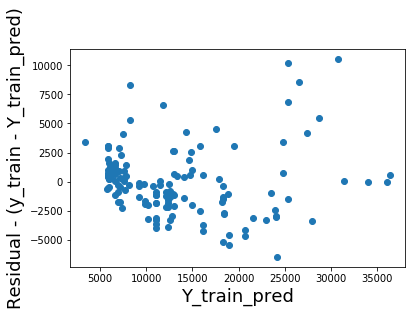

In [31]:
#Plotting the Residual Vs predicted graph
plt.scatter( y_train_pred,lr10.resid)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Y_train_pred', fontsize = 18)
plt.ylabel('Residual - (y_train - Y_train_pred)', fontsize = 18)

#### The Residual shows no pattern of a funnel and seems to have a constant variance. Homoscedasticity can be looked at

In [32]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
test = sms.het_breuschpagan(lr10.resid, lr10.model.exog)
print (lzip(name, test))


[('Lagrange multiplier statistic', 38.38991297831702), ('p-value', 1.4835790768164738e-05), ('f-value', 5.423163473558773), ('f p-value', 2.515166286116944e-06)]


#### Null hypothesis of the residuals having constant variance is rejected since the -value < 0.05. 

#### Model 5 seems to be a good Model
- Error are at mean ~ 0 and normally distributed. 
- Residual Vs Prediction seems to show homoscedasticity when plotted and has a lower value than 0.05 when looked at statistically

### 5 - Making the prediction on the test data using Model 6

In [33]:
# Scale the Test set as per the Train dataset
lst_scaler_col = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke', \
                  'compressionratio','horsepower','peakrpm','citympg','highwaympg']

X_test[lst_scaler_col] = scaler.transform(X_test[lst_scaler_col])

In [34]:
#Add the next best co-related column - 'Car'
lst_vars = ['aspiration', 'enginelocation', 'carwidth',  'boreratio', \
         'Car_bmw',   \
        'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', \
         'cylindernumber_twelve']

X_test_lm = sm.add_constant(X_test[lst_vars])
y_test_pred = lr10.predict(X_test_lm)


In [35]:
#X_test_lm.info()

Text(0, 0.5, 'Residual - (y_test - Y_test_pred)')

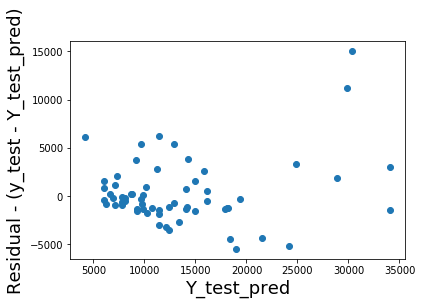

In [36]:
#Plotting the Residual Vs predicted graph
#plt.scatter( y_train_pred,(y_train - y_train_pred))
plt.scatter( y_test_pred,(y_test - y_test_pred))
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Y_test_pred', fontsize = 18)
plt.ylabel('Residual - (y_test - Y_test_pred)', fontsize = 18)

In [37]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
test = sms.het_breuschpagan((y_test - y_test_pred), X_test_lm)
print (lzip(name, test))

[('Lagrange multiplier statistic', 33.41898852612405), ('p-value', 0.00011287564963549674), ('f-value', 9.020101545692272), ('f p-value', 2.5503036951409886e-07)]


In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)


0.8306476124590545

### 6- Model Evaluation by looking at the R square score . Score of 0.914 achieved on the Test data. Also statistically the residual qualify the homoscedasticity test p > 0.05

Text(0, 0.5, 'y_pred')

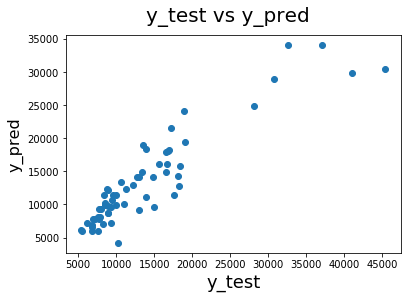

In [39]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)    

#### The test values and the predicted values are more or less in the same range and hence this seems like a good model